In [145]:
import numpy as np
from OpenEphys import loadContinuous
import os
import glob
from scipy import signal as ss
from scipy import stats as st
from scipy.signal import butter, lfilter, freqz
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#Select file for analysis
files_to_be_converted = ['Pre 1','Pre 2','Pre 3','Cit 1','Cit 2','Cit 3','Way 1', 'Way 2','Way 3']
source_folder = r'/Users/sharplab/tran/EEG data'

path = "/".join([source_folder,files_to_be_converted[0]])
os.chdir(path)
file = glob.glob("*.continuous")
print(file[0])
eegdata = loadContinuous(file[0], dtype=float)
array = eegdata['data']

#Functions for filters
def butter_lowpass(low_cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_low_cutoff = low_cutoff / nyq
    b_low, a_low = butter(order, normal_low_cutoff, btype='low', analog=False)
    return b_low, a_low

def butter_lowpass_filter(data, low_cutoff, fs, order=5):
    b_low, a_low = butter_lowpass(low_cutoff, fs, order=order)
    y_low = lfilter(b_low, a_low, data)
    return y_low

# Filter requirements.
order = 5
fs = 30000.0       # sample rate, Hz
low_cutoff = 100 # desired cutoff frequency of the filter, Hz
high_cutoff = 0.1


# Filter the data.
print('Filtering data')
filtered_array = butter_lowpass_filter(array, low_cutoff, fs, order)

#Choose the shape for the newarray after downsampling
duration = np.shape(array)[0]/30000
newarrayshape = np.real(int(round(256*duration)))

#downsampling the data array
print('Downsampling data')
newarray=ss.resample(filtered_array, newarrayshape)

100_CH43.continuous
Loading continuous data...
Filtering data
Downsampling data


In [143]:
#Binning the array into 1024 bins (4 seconds of 256 Hz)

#bin_container = np.array_split(newarray, np.round(len(newarray)/1024))

#Spectrogram the binned array
sampling_rate =256
df_list = []
for ind, bin_ in enumerate(bin_container):
    binned_frequencies, binned_time, binned_Sxx = ss.spectrogram(bin_,
                                                             sampling_rate, nperseg=1024)
    df = pd.DataFrame(data=binned_Sxx,
                     columns=binned_time,
                     index=binned_frequencies).transpose()
    df = df.apply(np.mean, axis=0)
    
    time = binned_time[0] + (ind * 4)
    df = pd.DataFrame({'frequency': df.index.values,
                   'frequency values': df.values,
                   'time': time})
    df['time'] = pd.to_timedelta(df['time'], unit='s')
    df = df.set_index('time')
    df = df.reset_index().pivot(index='time', columns='frequency', values='frequency values')
    df_list.append(df)

df = pd.concat(df_list)
df.head()

frequency,0.0,0.25,0.5,0.75,1.0,1.25,1.5,1.75,2.0,2.25,...,125.75,126.0,126.25,126.5,126.75,127.0,127.25,127.5,127.75,128.0
time,,,,,,,,,,,,,,,,,,,,,
00:00:02,2.117209e-20,7.718701e-18,6.012900e-19,2.904944e-18,3.415976e-18,2.207512e-18,1.243319e-18,1.024808e-18,5.686369e-19,1.237250e-19,...,5.160700e-23,1.438405e-23,8.476141e-23,2.525186e-23,7.924344e-23,2.649453e-24,7.439680e-25,5.511903e-23,6.739233e-23,5.592347e-26
00:00:06,3.396507e-20,3.604421e-19,4.693684e-19,4.666289e-19,6.876984e-19,3.717791e-19,1.215812e-18,1.064114e-18,1.334641e-19,5.548681e-19,...,9.793791e-23,5.161737e-23,1.477651e-22,9.312814e-23,5.238287e-23,3.766247e-23,1.805706e-22,1.329105e-23,4.008603e-23,1.811455e-23
00:00:10,1.164419e-20,8.228513e-18,1.434707e-17,7.218332e-18,2.597921e-19,1.744852e-20,1.132477e-19,2.567512e-18,1.497877e-18,9.260624e-20,...,5.872871e-23,3.006241e-24,1.788203e-23,4.852195e-23,2.114212e-22,2.771936e-22,1.171030e-22,2.937490e-23,1.064849e-23,7.328883e-24
00:00:14,1.799909e-19,3.482435e-18,7.286703e-18,2.619612e-18,2.298640e-18,5.842075e-19,1.427182e-18,9.556964e-19,7.491333e-19,8.790590e-19,...,7.313298e-23,1.165297e-22,9.773170e-23,1.609119e-22,7.430134e-24,4.545382e-23,4.826641e-23,8.659174e-24,7.723409e-23,1.313871e-22
00:00:18,2.395697e-19,1.982627e-18,2.861945e-18,6.936627e-18,3.583269e-18,4.077437e-19,2.955320e-18,6.428272e-19,1.772343e-19,9.773181e-19,...,1.272971e-23,5.990403e-23,1.475126e-22,1.016196e-23,1.102099e-22,2.438471e-23,1.103164e-23,2.281082e-24,2.545958e-23,1.127485e-23


In [238]:
bin_size = sampling_rate * 1

binned_frequencies, binned_time, binned_Sxx = ss.spectrogram(newarray,
                                                             sampling_rate, nperseg=bin_size)
df = pd.DataFrame(data=binned_Sxx,
                     columns=binned_time,
                     index=binned_frequencies).transpose()

df.head()

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,119.0,120.0,121.0,122.0,123.0,124.0,125.0,126.0,127.0,128.0
0.500,249.620366,1817.718623,5298.646988,2005.561288,4828.011989,1110.742908,1219.667929,738.181210,154.338338,636.340769,...,0.008346,0.708006,0.178908,0.006687,0.194692,0.065243,0.013901,0.010576,0.002858,0.001190
1.375,61.280206,10171.385021,1984.353156,125.031283,177.660210,70.191503,114.731408,58.676410,2.207121,8.895787,...,0.037433,0.567315,0.153674,0.016243,0.074112,0.025108,0.005462,0.021274,0.014844,0.010953
2.250,0.360690,16783.556643,3941.987524,247.075342,185.834514,51.656617,176.230127,172.318323,94.785389,83.754866,...,0.054089,0.394152,0.170148,0.034903,0.188454,0.004779,0.012335,0.041848,0.002768,0.012218
3.125,692.912051,42426.880702,3525.868515,954.963292,7356.232681,1284.699842,140.272727,1101.894165,378.829620,214.614550,...,0.000155,0.341024,0.122308,0.040637,0.144335,0.143739,0.005206,0.140681,0.008188,0.008703
4.000,7.921243,8340.931850,708.859420,577.375440,248.391280,59.631928,46.456171,138.272332,45.132426,42.550508,...,0.050115,0.208065,0.095785,0.007012,0.031246,0.004070,0.001737,0.013922,0.006735,0.001431


In [239]:
df = df.reset_index()
df = df.rename(columns={'index': 'time'})
df['time'] = pd.to_timedelta(df['time'], unit='s')
df.set_index('time', inplace=True)
df.head()

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,119.0,120.0,121.0,122.0,123.0,124.0,125.0,126.0,127.0,128.0
time,,,,,,,,,,,,,,,,,,,,,
00:00:00.500000,249.620366,1817.718623,5298.646988,2005.561288,4828.011989,1110.742908,1219.667929,738.181210,154.338338,636.340769,...,0.008346,0.708006,0.178908,0.006687,0.194692,0.065243,0.013901,0.010576,0.002858,0.001190
00:00:01.375000,61.280206,10171.385021,1984.353156,125.031283,177.660210,70.191503,114.731408,58.676410,2.207121,8.895787,...,0.037433,0.567315,0.153674,0.016243,0.074112,0.025108,0.005462,0.021274,0.014844,0.010953
00:00:02.250000,0.360690,16783.556643,3941.987524,247.075342,185.834514,51.656617,176.230127,172.318323,94.785389,83.754866,...,0.054089,0.394152,0.170148,0.034903,0.188454,0.004779,0.012335,0.041848,0.002768,0.012218
00:00:03.125000,692.912051,42426.880702,3525.868515,954.963292,7356.232681,1284.699842,140.272727,1101.894165,378.829620,214.614550,...,0.000155,0.341024,0.122308,0.040637,0.144335,0.143739,0.005206,0.140681,0.008188,0.008703
00:00:04,7.921243,8340.931850,708.859420,577.375440,248.391280,59.631928,46.456171,138.272332,45.132426,42.550508,...,0.050115,0.208065,0.095785,0.007012,0.031246,0.004070,0.001737,0.013922,0.006735,0.001431


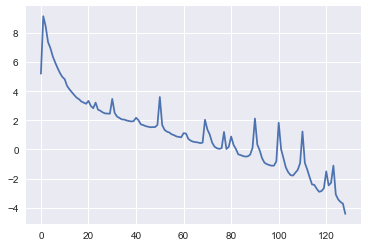

In [240]:
df_lowf = df.iloc[:, :]
mean_freqs = df_lowf.apply(np.mean, axis=0)
plt.plot(mean_freqs.index, np.log(mean_freqs))
plt.show()

In [236]:
print(np.shape(df.index.values))
print(np.shape(df.values))
print(np.shape(binned_time))
print(np.shape(binned_frequencies))
print(np.shape(binned_Sxx))
df.values

(41,)
(41, 12801)
(41,)
(12801,)
(12801, 41)


array([[2.82187622e+02, 8.90833964e+01, 2.05044708e+02, ...,
        4.40884986e-02, 3.43720587e-03, 1.83232271e-04],
       [1.21705935e+02, 3.53404652e+02, 3.33445841e+02, ...,
        1.29337678e-02, 3.84448689e-03, 1.75637325e-02],
       [1.51908790e+02, 4.57665400e-02, 4.31597962e+02, ...,
        5.48309826e-02, 3.53980986e-02, 4.08706890e-03],
       ...,
       [1.27502023e+02, 1.26918792e+00, 3.39602090e+01, ...,
        8.20970230e-03, 5.59455431e-03, 3.04712183e-03],
       [6.77214209e+01, 8.90680021e+00, 2.99536258e+01, ...,
        1.45802821e-02, 2.36787924e-02, 3.39645865e-02],
       [1.54567256e+01, 1.37369180e+03, 5.30536655e+03, ...,
        1.17854572e-01, 8.34286801e-02, 3.73187737e-03]])

import seaborn as sns
sns.set()


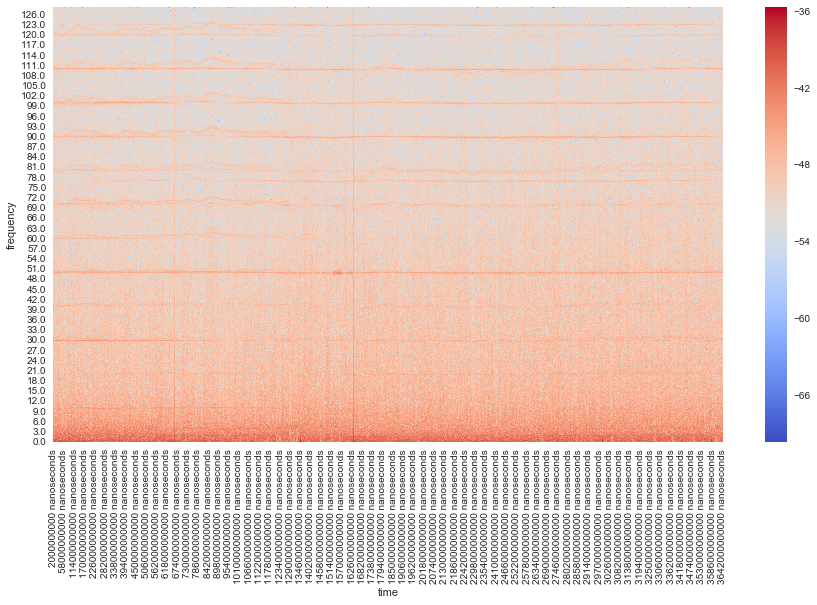

In [142]:
f, a = plt.subplots(figsize=(15,8))

a = sns.heatmap(np.log(df_lowf.transpose()), cmap='coolwarm')

a.invert_yaxis()
plt.show()

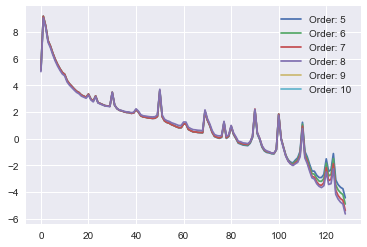

In [36]:
#investigating the effect of 'order' parameter on filtering
import seaborn as sns
sns.set()
output_dir = "/Users/sharplab/tran/order pics"


fs = 30000.0       # sample rate, Hz
low_cutoff = 100 # desired cutoff frequency of the filter, Hz
high_cutoff = 0.1
sampling_rate =256
for new_order in np.arange(5,11):
    filtered_array = butter_lowpass_filter(array, low_cutoff, fs, new_order)
    duration = np.shape(array)[0]/30000
    newarrayshape = np.real(int(round(256*duration)))
    newarray=ss.resample(filtered_array, newarrayshape)
    bin_container = np.array_split(newarray, np.round(len(newarray)/1024)+1)
    df_list = []
    for ind, bin_ in enumerate(bin_container):
        binned_frequencies, binned_time, binned_Sxx = ss.spectrogram(bin_,
                                                             sampling_rate)
        df = pd.DataFrame(data=binned_Sxx,
                     columns=binned_time,
                     index=binned_frequencies).transpose()
        df = df.apply(np.mean, axis=0)

        time = binned_time[0] + (ind * 4)
        df = pd.DataFrame({'frequency': df.index.values,
                       'frequency values': df.values,
                       'time': time})
        df['time'] = pd.to_timedelta(df['time'], unit='s')
        df = df.set_index('time')
        df = df.reset_index().pivot(index='time', columns='frequency', values='frequency values')
        df_list.append(df)

    df = pd.concat(df_list)
    df_lowf = df.iloc[:, :]
    mean_freqs = df_lowf.apply(np.mean, axis=0)
    plt.plot(mean_freqs.index, np.log(mean_freqs), label='Order: {}'.format(new_order))
plt.legend()
plt.savefig('{}/graph.png'.format(output_dir))
    

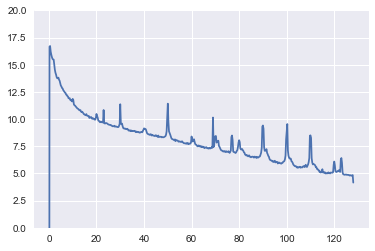

In [137]:
sum_series = pd.Series()
for ind, bin_ in enumerate(bin_container):
    periodogram_frequency, Pxx = ss.periodogram(bin_,sampling_rate, nfft=1024)
    ser = pd.Series(data=Pxx,index=periodogram_frequency)
    sum_series = sum_series.add(ser, fill_value=0)

plt.ylim((0,20))
plt.plot(np.log(sum_series))